## **Exercise 1: Descriptive Statistics & Data Visualization**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import statsmodels as sms

### **1. Load the iris dataset**

In [ ]:
# Load the iris dataset from sklearn using load_iris() function
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

# print the target names
print(iris['target_names'])

# replace the clssifications with the target names
df.replace({'target': {0: 'setosa', 1: 'versicolor', 2: 'virginica'}}, inplace=True)

['setosa' 'versicolor' 'virginica']


#### Displaying the dataframe

In [ ]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### **2. Descriptive Statistics**

#### Basic statistics

In [ ]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

#### Mean

In [ ]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

#### Median

In [ ]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

#### Mode

In [ ]:
df.mode()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.0               3.0                1.4               0.2   
1                NaN               NaN                1.5               NaN   
2                NaN               NaN                NaN               NaN   

       target  
0      setosa  
1  versicolor  
2   virginica

#### Variance

In [ ]:
df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

#### Median Absolute Deviation

In [ ]:
from statsmodels.robust.scale import mad

df[df.columns.values.tolist()[:-1]].apply(mad)

sepal length (cm)    1.037822
sepal width (cm)     0.444781
petal length (cm)    1.853253
petal width (cm)     1.037822
dtype: float64

#### Standard Deviation

In [ ]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

#### Quantiles

In [ ]:
df.quantile([0.25, 0.5, 0.75])

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0.25                5.1               2.8               1.60               0.3
0.50                5.8               3.0               4.35               1.3
0.75                6.4               3.3               5.10               1.8

#### Inter-Quantile Range

In [ ]:
def get_iqr(df: pd.DataFrame) -> None:
    """Calculate the interquantile range"""
    for i in df.columns[df.dtypes==float]:
        print(f"The interquantile range for {i} is: ", df[i].quantile(0.75) - df[i].quantile(0.25))

In [ ]:
get_iqr(df)

The interquantile range for sepal length (cm) is:  1.3000000000000007
The interquantile range for sepal width (cm) is:  0.5
The interquantile range for petal length (cm) is:  3.4999999999999996
The interquantile range for petal width (cm) is:  1.5


### **3. Plot a density plot for each of the variables**

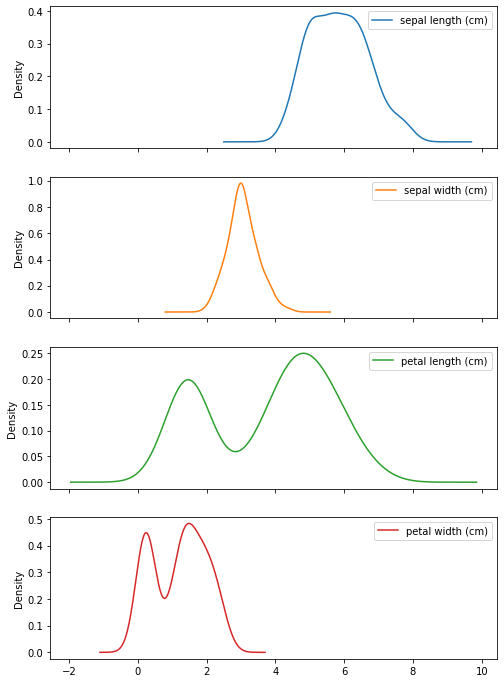

In [ ]:
density_plots = df.plot.density(subplots=True, figsize=(8, 12))

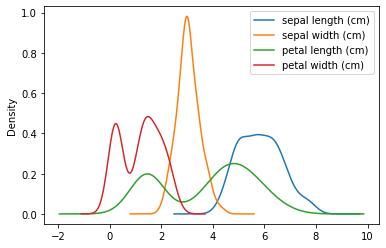

In [ ]:
density_plot = df.plot.density()



* The sepal width and length have unimodal distribution.
* Sepal length has a wider distribution compared to the sepal width.
* The petal width and length are bimodal distributions.
* The petal length has a wider distribution compared to the petal width.


### **4. Create a violin plot and explain what you see in the plots?**

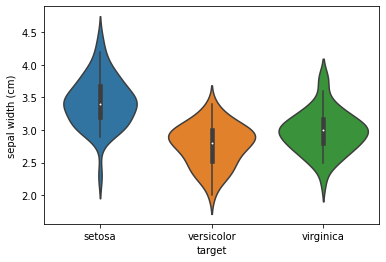

In [ ]:
ax = sns.violinplot(x='target', y="sepal width (cm)", data=df)

* It can be see that the median sepal width of setosa is larger than versicolor and virginica
* There are also more outliers in setosa than in the other 2 groups
* Most of the versicolor flowers have the sepal width of 3.0cm

## **Exercise 2 - Data-preprocessing**

### 1. Load the banknote authentication dataset from the given data_banknote_authentication.csv file. How many rows and columns does the dataset contain? (2 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("data_banknote_authentication.csv")
print(f"Number of columns: {len(dataset.columns)}\nNumber of rows: {len(dataset.index)}")
dataset

Number of columns: 5
Number of rows: 1382


Variance  Skewness  Curtosis  Entropy  Class
0          NaN    8.6661  -2.80730 -0.44699    0.0
1      4.54590    8.1674  -2.45860 -1.46210    0.0
2      3.86600   -2.6383   1.92420      NaN    0.0
3      3.45660    9.5228  -4.01120 -3.59440    0.0
4      0.32924   -4.4552   4.57180      NaN    0.0
...        ...       ...       ...      ...    ...
1377   4.36840    9.6718  -3.96060 -3.16250    0.0
1378   3.59120    3.0129   0.72888  0.56421    0.0
1379   2.09220   -6.8100       NaN -0.60216    0.0
1380   3.20320    5.7588  -0.75345 -0.61251    0.0
1381   1.53560    9.1772  -2.27180 -0.73535    0.0

[1382 rows x 5 columns]

### 2. Mention the different types of variables. Which types does your dataset contain? (2 point)

* There are two classes of data: Qualitative and Quantitative data, which are further classified into four types: nominal, ordinal, discrete, and Continuous.
* The Bank Note dataset contains 4 continous variables/features and 1 catagorical class variable (Full points if they mention 4 continous variables.)

### 3. Count the number of duplicate rows in the dataset. How can you remove the duplicate rows? (2 points)

In [3]:
dataset.duplicated().sum()

23

In [4]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

### 4. Count the number of missing values in the dataset. (1 points)

In [5]:
dataset.isnull().sum()

Variance    142
Skewness    135
Curtosis    130
Entropy     144
Class       135
dtype: int64

In [6]:
dataset.isnull().sum().sum()

686

### 5. How can you deal with missing values in your dataset? Implement one of the possible methods (2 points)

The method to be used depends on the type of missing values. Methods of dealing with missing values fall under 2 categories:

* Deletion (e.g. listwise deletion, dropping variable)
* Imputation (e.g. Mean/Median/Mode imputation, using predictive models for imputation)

A full explanation of the types of missing values and methods to deal with them can be found here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

In [7]:
dataset.dropna()

Variance  Skewness  Curtosis  Entropy  Class
1      4.54590    8.1674  -2.45860 -1.46210    0.0
3      3.45660    9.5228  -4.01120 -3.59440    0.0
5      4.36840    9.6718  -3.96060 -3.16250    0.0
6      3.59120    3.0129   0.72888  0.56421    0.0
8      3.20320    5.7588  -0.75345 -0.61251    0.0
...        ...       ...       ...      ...    ...
1366  -2.41000    3.7433  -0.40215 -1.29530    1.0
1367   0.40614    1.3492  -1.45010 -0.55949    1.0
1368  -1.38870   -4.8773   6.47740  0.34179    1.0
1369  -3.75030  -13.4586  17.59320 -2.77710    1.0
1370  -3.56370   -8.3827  12.39300 -1.28230    1.0

[809 rows x 5 columns]

In [8]:
dataset.dropna().isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

## **Exercise 3 - Correlation**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **1. Load the dataset from the dataset.tsv file**

In [2]:
dataset = pd.read_csv("dataset.csv", index_col=0)

### **2. Plot the scatterplot matrix. What can be seen in the scatterplot matrix?**

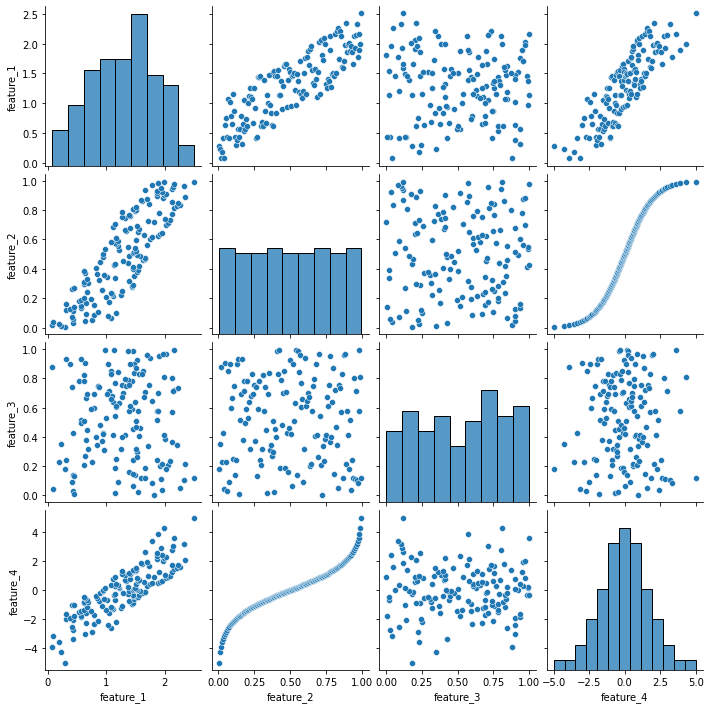

In [3]:
sns.pairplot(dataset)

#### Any 2 out of 4: 

* It can be seen that feature_2 and feature_4 are non-linearly related
* feature_1 and feature_2 are also non-linear but with a slight randomness (not necessary to identify the randomness)
* feature_3 seems to have no correlation with any other features
* feature_1 and feature_4 are linearly related.

### **3. Which correlation would suit the comparison of feature_1 and feature_3. Calculate the correlation value.**

In [4]:
print(f"Pearson's correlation coefficent: {dataset['feature_1'].corr(dataset['feature_3'], method='pearson')}")
print(f"Spearman's correlation coefficent: {dataset['feature_1'].corr(dataset['feature_3'], method='spearman')}")

Pearson's correlation coefficent: -0.004628298271604041
Spearman's correlation coefficent: -0.017550354079596653


* Full points: feature_1 and feature_3 are not related and there is no correlation between the 2 features. 
* 1 point: if they do not mention the fact that there is no correlation between the 2 features and only calculate the coefficient.

### **4. Plot the correlation heatmap for the entire dataset**

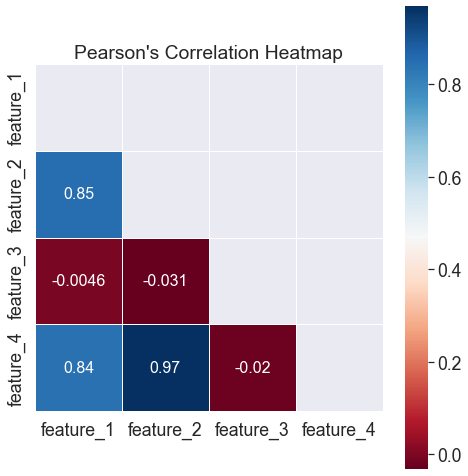

In [5]:
spear_corr = dataset.corr()
spear_mask = np.zeros_like(spear_corr.values)
spear_mask[np.triu_indices_from(spear_mask)] = True

sns.set(font_scale=1.6)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

with sns.axes_style("white"):
    sns.heatmap(spear_corr, mask=spear_mask, annot=True, fmt=".2g", annot_kws={'fontsize': 'small'}, square=True, linewidths=.5, cmap="RdBu", ax=ax)
    ax.set_title("Pearson's Correlation Heatmap")

plt.tight_layout()
plt.show()